In [ ]:
from regression import classifier
from sklearn.model_selection import train_test_split



a = classifier()
seqs_list = a.readFa2seqslist('x-2k_sequence.fa')
seqs_train,seqs_test = train_test_split(seqs_list,test_size=0.2,random_state=1008600)


df_train = a.seqs2df(seqs_train,5)
# print ('df_train done')
x_train = df_train.iloc[:,:df_train.shape[1]-1]
y_train = df_train['target']
# print (x_train.head(5))
# print (y_train.shape)

df_test = a.seqs2df(seqs_test,5)
x_test = df_test.iloc[:,:df_test.shape[1]-1]
y_test = df_test['target']

In [2]:
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr

model = Lasso()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
p = pearsonr(y_predict,y_test)

print (p)


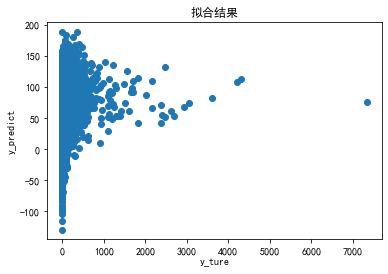

In [6]:
# 画出数据和拟合直线的图

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False


plt.scatter(y_test, y_predict)
#plt.plot(y_test,y_predict,'b')
plt.xlabel("y_ture") 
plt.ylabel("y_predict") 
plt.title("拟合结果")
plt.show()